## MODELO DE REGRESSÃO LOGÍSTICA PARA CLASSIFICAÇÃO DE DOENÇA CARDIOVASCULAR
---
Simulação de uma modelo de Regressão Logística para classificação de doença.Nessa Simulação foi utilizado uma banco de dados ficticio somente coma finalidade de explicação de uma modelo Regressão para classificação. O Objetivo é tentar classificar o paciente como doente ou não com base em outras variáveis explicativas.

---
VARIÁVEIS DO BANCO DE DADOS:


*  Idade (dias)
*  Altura (cm)
* Peso (kg) |
* Sexo
*  Pressão Sistólica (valor mais alto)
*  Pressão Diastólica (valor mais baixo)
*  Colesterol
*  Glicose
*  Fumante
* Alcool
* Atividade Fisica

---



In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score,KFold,StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,average_precision_score,recall_score,roc_auc_score
from sklearn.preprocessing import RobustScaler,StandardScaler,LabelEncoder,MinMaxScaler

from sklearn.linear_model import LogisticRegression

## ANÁLISE DOS DADOS

---
Etapa onde se analisa os dados para um melhor entendimento do banco de dados. Etapa crucial para que se posa identificar algum problema nos dados para que eles possam ser tratados antes de seguir com o modelo.


In [116]:
data = pd.read_csv('cardio_saude.csv', sep = ';',encoding= 'utf-8' )
data.head(10)

,id,Idade,Sexo,Altura,Peso,Pressao S,Pressao D,Colesterol,Glicose,Fumante,Alcool,Atividade Fisica,Doenca
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                70000 non-null  int64  
 1   Idade             70000 non-null  int64  
 2   Sexo              70000 non-null  int64  
 3   Altura            70000 non-null  int64  
 4   Peso              70000 non-null  float64
 5   Pressao S         70000 non-null  int64  
 6   Pressao D         70000 non-null  int64  
 7   Colesterol        70000 non-null  int64  
 8   Glicose           70000 non-null  int64  
 9   Fumante           70000 non-null  int64  
 10  Alcool            70000 non-null  int64  
 11  Atividade Fisica  70000 non-null  int64  
 12  Doenca            70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


RENOMEANDO VARIÁVEIS

---



In [118]:
list(data)

['id',
 'Idade',
 'Sexo',
 'Altura',
 'Peso',
 'Pressao S',
 'Pressao D ',
 'Colesterol',
 'Glicose',
 'Fumante',
 'Alcool',
 'Atividade Fisica',
 'Doenca']

In [119]:
novos_nomes = {
    "'id'": "id",
    "'Idade'": "Idade",
    "'Sexo'": "Sexo",
    "'Altura'": "Altura",
    "'Peso'": "Peso",
    "'Pressao S'": "Pressao S",
    "'Pressao D '": "Pressao D",
    "'Colesterol'": "Colesterol",
    "'Glicose'": "Glicose",
    "'Fumante'": "Fumante",
    "'Alcool'": "Alcool",
    "'Atividade Fisica'": "Atividade Fisica",
    "'Doenca'": "Doenca"
}


data = data.rename(columns=novos_nomes)
list(data)

['id',
 'Idade',
 'Sexo',
 'Altura',
 'Peso',
 'Pressao S',
 'Pressao D ',
 'Colesterol',
 'Glicose',
 'Fumante',
 'Alcool',
 'Atividade Fisica',
 'Doenca']

MEDIDAS DESCRITIVAS

---



In [120]:
data.describe()

,id,Idade,Sexo,Altura,Peso,Pressao S,Pressao D,Colesterol,Glicose,Fumante,Alcool,Atividade Fisica,Doenca
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


NULOS

---



In [121]:
data.isnull().sum()

id                  0
Idade               0
Sexo                0
Altura              0
Peso                0
Pressao S           0
Pressao D           0
Colesterol          0
Glicose             0
Fumante             0
Alcool              0
Atividade Fisica    0
Doenca              0
dtype: int64

CORRELAÇÃO

---



In [122]:
corr = data.corr()
corr

,id,Idade,Sexo,Altura,Peso,Pressao S,Pressao D,Colesterol,Glicose,Fumante,Alcool,Atividade Fisica,Doenca
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
Idade,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
Sexo,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
Altura,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
Peso,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
Pressao S,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
Pressao D,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
Colesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
Glicose,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
Fumante,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


<Axes: >

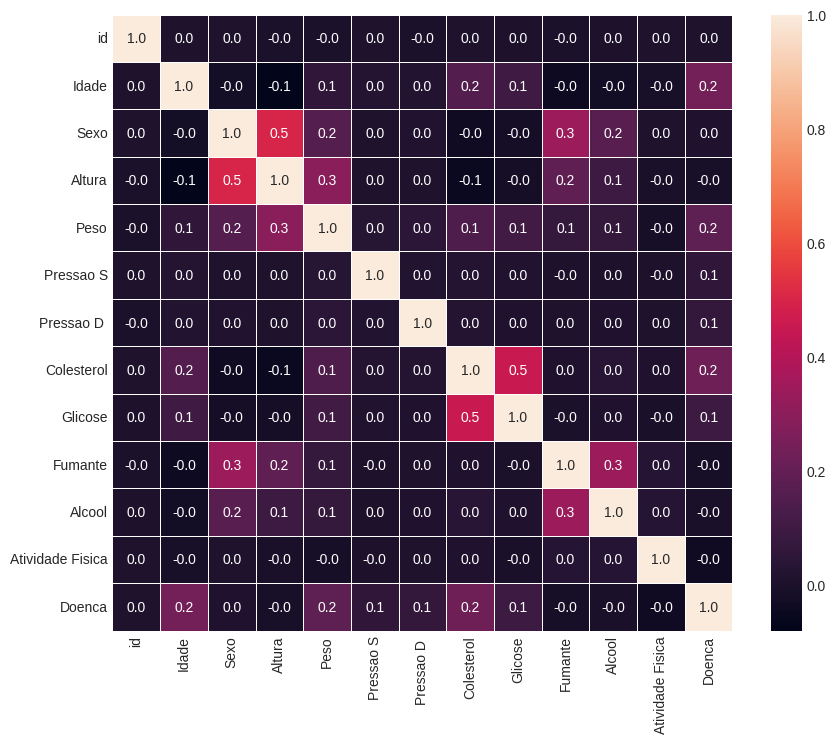

In [123]:
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [124]:
#tirando alguns outliers para verificar  melhor a correlação
data = data[(data["Pressao S"]<=250) & (data["Pressao D "]<=200)]
data = data[(data["Pressao S"] >= 0) & (data["Pressao D "] >= 0)]

<Axes: >

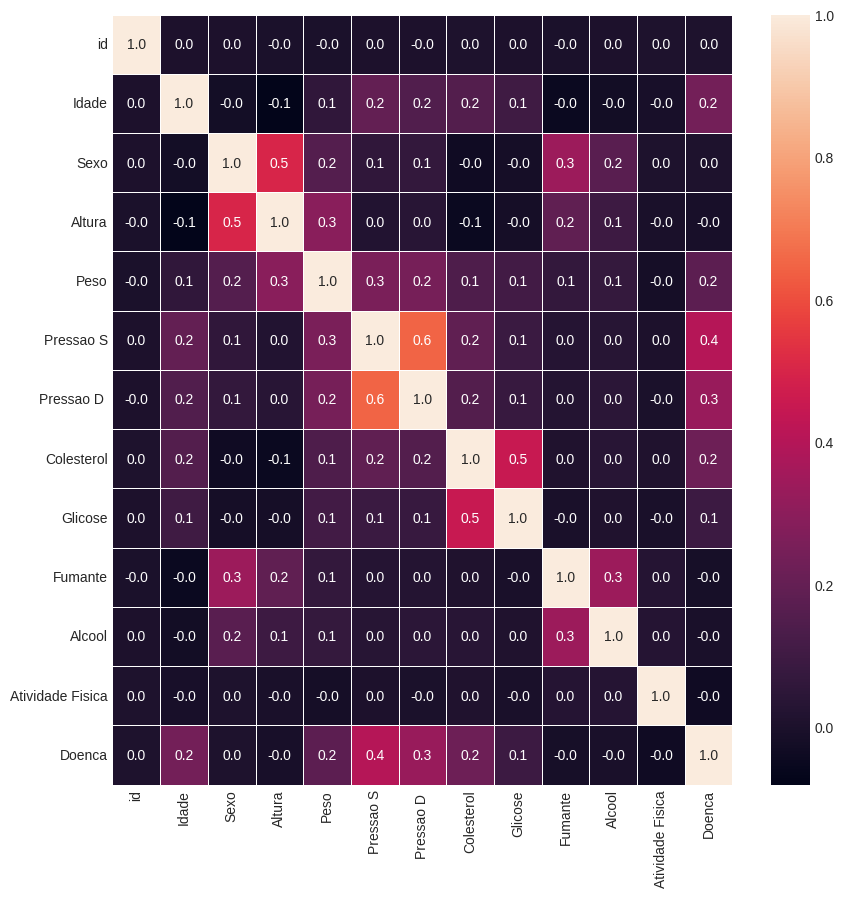

In [161]:
corr = data.corr()
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

* As variáveis selecionadas que possuem uma correlação significativa foram Pressão S , Pressão D, Altura, Peso, Idade e Colesterol.

VISUALIZAÇÃO DE ALGUMAS  VARIÁVEIS INDEPENDENTES

---



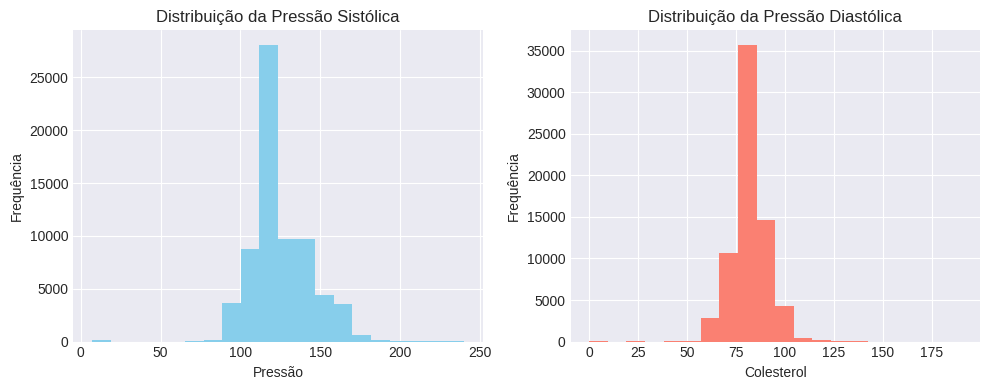

In [126]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(data['Pressao S'], bins=20, color='skyblue')
plt.title('Distribuição da Pressão Sistólica')
plt.xlabel('Pressão')
plt.ylabel('Frequência')


plt.subplot(1, 2, 2)
plt.hist(data['Pressao D '], bins=20, color='salmon')
plt.title('Distribuição da Pressão Diastólica')
plt.xlabel('Colesterol')
plt.ylabel('Frequência')


plt.tight_layout()
plt.show()

## ENGENHARIA DE DADOS

---
Etapa onde se trata as variáveis .Casos como exclusão de dados outliers, imputação de valores ausentes e etc.. Nesse caso vamos tratar a variável dependente 'doenca' pois ela apresenta valores desbalanceados a para a aplicação do modelo de regressão logística é necessario que as classes estejam balanceadas pra um melhor desempenho do modelo.


BALANCEAMENTO DA VARIAVEL RESPOSTA

---



In [127]:
data['Doenca'].value_counts()

0    34853
1    34146
Name: Doenca, dtype: int64

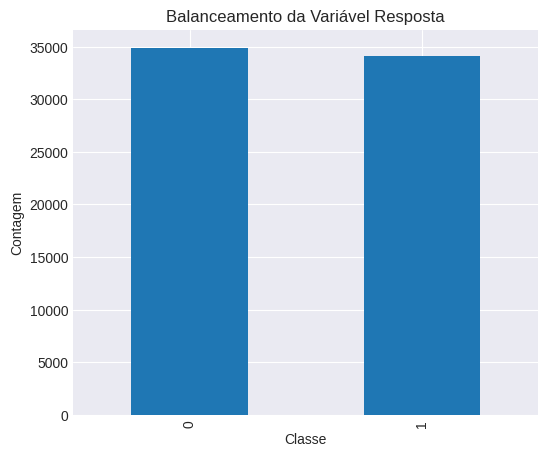

In [128]:
contagem_classe = data['Doenca'].value_counts()
contagem_classe.plot(kind='bar' , figsize = (6,5))
plt.title('Balanceamento da Variável Resposta')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.show()

*  A variável Target esta balanceada não iremos mexer nela. Caso as classe houvesse alguma discrepancia muito grante usariamos alguma técnica para balacear as classes.

NORMALIZANDO OS DADOS SELECIONADOS

---



In [137]:
dados_novos = data.copy()

In [142]:
colunas_normalizar = ['Pressao S','Pressao D ','Idade','Altura','Peso']

tipo_scaler = 'MinMax'
if(tipo_scaler=='Standard'):
    scaler = StandardScaler((0,1))
elif(tipo_scaler=='Robust'):
    scaler = RobustScaler()
elif(tipo_scaler=='MinMax'):
    scaler = MinMaxScaler(feature_range=(0, 1))

for col in colunas_normalizar:
    dados_novos[col] = scaler.fit_transform(dados_novos[col].values.reshape(-1,1))

VERIFICANDO A PRESENÇA DE OUTLIERS

---



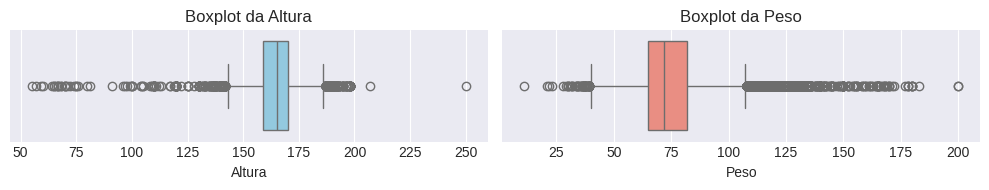

In [138]:
plt.figure(figsize=(10, 2))
plt.subplot(1, 2, 1)
sns.boxplot(x=data['Altura'], color='skyblue')
plt.title('Boxplot da Altura')


plt.subplot(1, 2, 2)
sns.boxplot(x=data['Peso'], color='salmon')
plt.title('Boxplot da Peso')

plt.tight_layout()
plt.show()

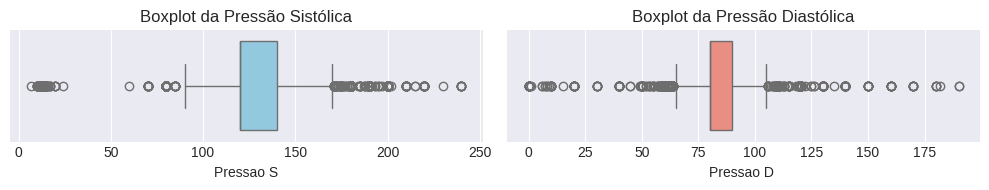

In [139]:
plt.figure(figsize=(10, 2))
plt.subplot(1, 2, 1)
sns.boxplot(x=data['Pressao S'], color='skyblue')
plt.title('Boxplot da Pressão Sistólica')


plt.subplot(1, 2, 2)
sns.boxplot(x=data['Pressao D '], color='salmon')
plt.title('Boxplot da Pressão Diastólica')

plt.tight_layout()
plt.show()

TRATANDO OUTLIERS

---



In [143]:
colunas_outliers = ['Pressao S', 'Pressao D ', 'Idade', 'Altura', 'Peso']

#identificar e tratar outliers usando IQR
def tratar_outliers(dados_novos, coluna):
    Q1 = dados_novos[coluna].quantile(0.25)
    Q3 = dados_novos[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    dados_novos[coluna] = dados_novos[coluna].apply(lambda x: limite_superior if x > limite_superior else (limite_inferior if x < limite_inferior else x))
    return dados_novos


for coluna in colunas_outliers:
    dados_novos = tratar_outliers(dados_novos, coluna)


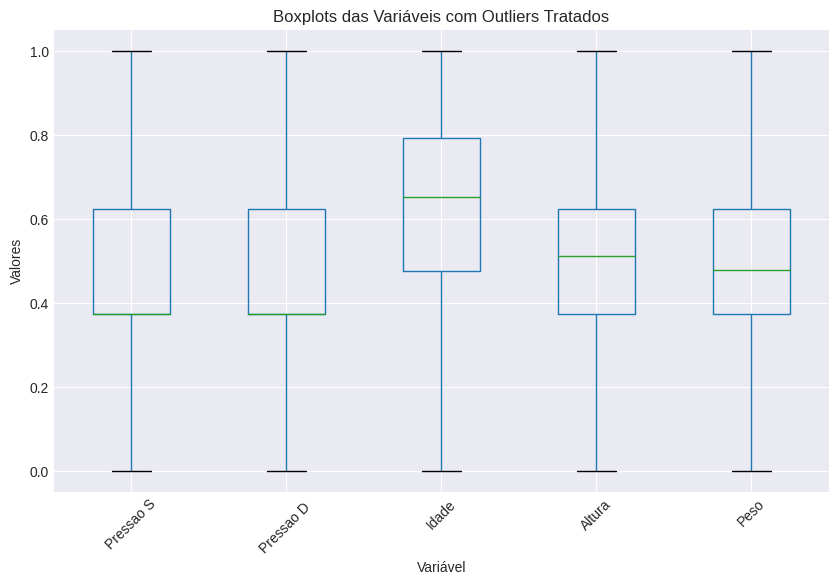

In [144]:
plt.figure(figsize=(10, 6))
dados_novos[colunas_outliers].boxplot()
plt.title('Boxplots das Variáveis com Outliers Tratados')
plt.xlabel('Variável')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## CIÊNCIA DE DADOS

---
Etapa onde se faz inferência dos dados a partir de modelos e técnicas estatísticas especificas com a finalidade de responder alguma pergunta ou resolver algum prblema especifico. Nesse caso usaremos técnicas estatísticas com a finalidade de obter um modelo de classificação para os dados em estudo.


In [145]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

SELECIONANDO AS VARIÁVEIS PARA O MODELO

---



In [146]:
X = data[['Idade','Altura', 'Peso', 'Pressao S', 'Pressao D ', 'Colesterol']] #variaveis independentes
y = data['Doenca'] #variavel dependente

SEPARANDO DADOS DE TREINO E TESTE E ESCALONAMENTO DAS VARIAVEIS

---



In [147]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [148]:
#separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 O  escalonamento tem como objetivo normalizar as variáveis para que elas tenham uma média de zero e um desvio padrão de um, é importante escalonar as variáveis principalmente se elas não estão na mesma escala para melhorar o desempenho e a estabilidade do modelo.

In [149]:
#escalonamento das variáveis
scaler = StandardScaler()
X_train_escalonado = scaler.fit_transform(X_train)
X_test_escalonado = scaler.transform(X_test)

TREINANDO O MODELO LOGISTICO PARA GERAR AS PROBABILIDADES

---

In [150]:
import statsmodels.api as sm

In [151]:
modelo = sm.Logit(y_train, X_train_escalonado).fit()

Optimization terminated successfully.
         Current function value: 0.568806
         Iterations 6


In [152]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Doenca   No. Observations:                55199
Model:                          Logit   Df Residuals:                    55193
Method:                           MLE   Df Model:                            5
Date:                Sun, 31 Mar 2024   Pseudo R-squ.:                  0.1793
Time:                        15:50:09   Log-Likelihood:                -31398.
converged:                       True   LL-Null:                       -38258.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3616      0.010     35.786      0.000       0.342       0.381
x2            -0.0440      0.010     -4.268      0.000      -0.064      -0.024
x3             0.1707      0.011     15.662      0.000       0.149       0.192
x4             0.8083      0.016     50.115      0.000       0.777       0.840
x5             0.2111      0.014     14.914      0.000       0.183       0.239
x6             0.3043      0.010     29.271      0.000       0.284       0.325
==============================================================================
"""

*  O modelo é estatisticamente significativo para prever a variável dependente Doença , porém apenas 17,95% da variância da variável dependente é explicada pelo modelo.

PREVISÕES

---



In [153]:
previsoes = modelo.predict(X_test_escalonado)

In [154]:
previsoes

array([0.35993692, 0.80450548, 0.24118614, ..., 0.31117046, 0.85381255,
       0.89753329])

FUNÇÕES

---



In [155]:
#tranformando as previsoes para forma binaria

def binary_classify(x):
    x = round(x, 2)
    if x >= 0.50:
        return 1
    return 0

pred = list(map(binary_classify, previsoes))

In [156]:
#a função log é definida apartir dos coeficientes que o modelo nos retornou

def log_func(x):
    scl, sbp = x
    result = (0.3553 * 'Idade') + (-0.0539 * 'Altura') + (0.1633 * 'Peso') +(0.8048 * 'Pressao S') + (0.2224 * 'Pressao D ') + (0.3019 * 'Colesterol')
    return result

#função para classificação em binario pela função log definida acima

def binary_classify(x):
    x = round(x, 2)
    if x >= 0.50:
        return 1
    return 0

def predict(x):
    return binary_classify(log_func(x))

#função para classificar o paciente em doente ou não

def print_result(x):
    if predict(x) == 1:
        return "Doente"
    return "Não Doente"

ACÚRACIA

---



In [157]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [158]:
sklearn.metrics.accuracy_score(y_test, pred)

0.7227536231884057

O modelo consegue classificar corretamente cerca de 72% da suas previsões.

In [159]:
print (classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74      6952
           1       0.75      0.67      0.70      6848

    accuracy                           0.72     13800
   macro avg       0.73      0.72      0.72     13800
weighted avg       0.73      0.72      0.72     13800



*  O modelo foi  preciso igualmente em prever valores de ambas as classes  não havendo portanto uma distorção nos valores entre as classes previstas.

In [106]:
display(pd.crosstab(y_test, pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito,0,1,All
Real,,,
0,5482,1502,6984
1,2297,4509,6806
All,7779,6011,13790


Na tabela acima podemos observar que de um total de 6011 valores preditos pelo modelo da classe 1 ele acertou 4509 e errou 1502, já das 7779 previsões da classe 0 ele preveu que 2297 como classe 0 sendo que o valor real era 1 e acertou 5482 das suas previsões.
Os resultados indicam um modelo razoavelmente bom em entender a variabilidade dos seus dados  mostrando- se eficaz porém não descartando o uso de outras técnicas de classificação mais avançadas para melhorar sua previsão.

CONSULTANDO DADOS DO PACIENTE

---



In [111]:
test = data.iloc[30] # paciente localizado na linha 30
test = test[['Idade', 'Altura', 'Peso', 'Pressao S', 'Pressao D ', 'Colesterol']]
test

Idade         18291.0
Altura          155.0
Peso            105.0
Pressao S       120.0
Pressao D        80.0
Colesterol        3.0
Name: 30, dtype: float64

TESTANDO O MODELO

---



In [109]:
#Parametros para tentar prever a classificação do paciente

Idade = 18291.0
Altura = 155.0
Peso = 105.0
Pressao_S = 120.0
Pressao_D = 80.0
Colesterol = 3.0


input_test = np.array([Idade, Altura, Peso, Pressao_S, Pressao_D ,Colesterol]).reshape(1, -1)

# Fazendo previsões usando o modelo treinado
previsoes = modelo.predict(input_test)
pred = list(map(binary_classify, previsoes))

# Classificando o resultado da previsão
if pred[0] == 1:
    resultado = "Paciente Doente."
else:
    resultado = "Paciente Saudável."

print('Classificação do Paciente: ' + resultado)


Classificação do Paciente: Paciente Doente.


In [112]:
 data.iloc[30]

id                     42.0
Idade               18291.0
Sexo                    1.0
Altura                155.0
Peso                  105.0
Pressao S             120.0
Pressao D              80.0
Colesterol              3.0
Glicose                 1.0
Fumante                 0.0
Alcool                  0.0
Atividade Fisica        1.0
Doenca                  1.0
Name: 30, dtype: float64

Ao consultar os dados do paciente da linha 30 podemos observar que o modelo acertou a previsão pois o paciente é Doente.